In [1]:
import pandas as pd 
import numpy as np
import json
from ast import literal_eval
from collections import defaultdict
import datetime
import nltk
nltk.download("all")
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from math import ceil,isnan
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package cess_cat is already up-

[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package switchboard is already up-to-date!
[nltk_data]    | Downloading package timit to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package twitter_samp

# Data Processing

In [2]:
path = '/Users/shashankp/Desktop/Data Mining/Final Project/'
movie_metadata = pd.read_csv(path+'the-movies-dataset/movies_metadata.csv')
keywords = pd.read_csv(path+'the-movies-dataset/keywords.csv')
movie_metadata.drop(['homepage','belongs_to_collection','poster_path','imdb_id',
                     'original_title'],axis=1,inplace=True)
movie_metadata.head()

/Users/shashankp/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Helper Functions 

In [47]:
def get_col(row,col_name):
    if(col_name == 'genres'):
        return row.genres
    elif(col_name == 'production_countries'):
        return row.production_countries
    elif(col_name == 'production_companies'):
        return row.production_companies
    elif(col_name == 'keywords'):
        return row.keywords
    else:
        return row.spoken_languages

def convert_to_list(df,col_name):
    df[col_name].fillna('[]',inplace=True)  
    df[col_name] = df[col_name].apply(literal_eval)
    return df
    
def generate_labels(df,col_name,count=100):
    df = df[get_col(df,col_name).apply(lambda x: isinstance(x,list))]
    unique_labels = defaultdict(int)
    for row in df.itertuples():
        for col in get_col(row,col_name):
            if(isinstance(col['name'],str)):
                unique_labels[col['name']] += 1
    unique_labels = {k:v for k,v in unique_labels.items() if v >= count}
    for label in unique_labels:
        df = df.assign(label = 0)
    for row in df.itertuples():
        for col in get_col(row,col_name):
            if col['name'] in unique_labels:
                df.at[row.Index,col['name']] = 1
    df.drop([col_name],axis=1,inplace=True)
    return (df,unique_labels)
        
def encode_bool_to_binary(df,col_name):
    df[~df[col_name].isin(['False','True'])][col_name] = 'False'
    df[col_name] = df[col_name].apply(lambda x: 1 if x=='True' else 0)
    return df
     
def fill_na_cols(df,cols):
    all_cols = set(df.columns)
    for col in cols:
        if col in all_cols:
            df[col].fillna(0,inplace=True)
            df[col] = df[col].apply(int)
    return df
    
def fill_with_median(df,col_name):
    df[col_name] = df[col_name].fillna(df[col_name].median())
    return df
    
def one_hot_encode(df,col_name,suffix=None):
    dummies = pd.get_dummies(df[col_name])
    if(suffix!=None):
        dummies.rename(columns={col: suffix+"_"+col for col in dummies.columns},
                       inplace=True)
    df.drop([col_name],axis=1,inplace=True)
    df = df.join(dummies)
    return (df,dummies.columns)

def flatten(ls):
    new_list = []
    for sublist in ls:
        for arr in sublist:
            try:
                new_list.append(arr)
            except:
                pass
    return new_list

def join(df1,df2,col_name,count=100):
    df2[col_name] = df2[col_name].apply(flatten)
    df = pd.merge(df1,df2,how='left',on='id')
    (df,unique_labels) = generate_labels(df,col_name,count)
    return (df,unique_labels)

def convert_to_int(idx):
    try:
        return int(idx)
    except:
        return np.nan

def encode_date(df,col_name):
    df = df[df[col_name].apply(lambda x: isinstance(x,str))]
    df = df.assign(year = 0)
    df = df.assign(month = 0)
    for ind,row in df.iterrows():
        try:
            dt = datetime.datetime.strptime(row.release_date,'%Y-%m-%d')
            df.loc[ind,'year'] = dt.year
            df.loc[ind,'month'] = dt.month
        except:
            pass
    df.drop(['release_date'],axis=1,inplace=True)
    year_med = int(df[df['year']>=0]['year'].median())
    month_med = int(df[df['month']>=0]['month'].median())
    df[df['year']>=0]['year'] = year_med
    df[df['month']>=0]['month'] = month_med
    return df

## Generate labels for genres (etc.)

In [56]:
movie_metadata = movie_metadata[movie_metadata['id'].notnull()]
movie_metadata['id'] = movie_metadata['id'].apply(convert_to_int)
movie_metadata = movie_metadata[movie_metadata['id'].notnull()]
(movie_metadata,orig_lang_labels) = one_hot_encode(movie_metadata,'original_language',
                                'original_language')
movie_metadata = convert_to_list(movie_metadata,'spoken_languages')
(movie_metadata,spoken_languages) = generate_labels(movie_metadata,
                                                    'spoken_languages')
movie_metadata = convert_to_list(movie_metadata,'production_companies')
(movie_metadata,production_companies) = generate_labels(movie_metadata,
                                                        'production_companies')
movie_metadata = convert_to_list(movie_metadata,'production_countries')
(movie_metadata,production_countries) = generate_labels(movie_metadata,
                                                       'production_countries',200)
movie_metadata = convert_to_list(movie_metadata,'genres')
(movie_metadata,genres) = generate_labels(movie_metadata,'genres')
keywords = convert_to_list(keywords,'keywords')
keywords = keywords.groupby('id').agg(lambda x: x.tolist())
(movie_metadata,frequent_keywords) = join(movie_metadata,keywords,'keywords',100)
del keywords
movie_metadata = encode_date(movie_metadata,'release_date')
movie_metadata = encode_bool_to_binary(movie_metadata,'adult')
movie_metadata = encode_bool_to_binary(movie_metadata,'video')
movie_metadata['adult'] = movie_metadata['adult'].apply(int)
movie_metadata['video'] = movie_metadata['video'].apply(int)
(movie_metadata,status_labels) = one_hot_encode(movie_metadata,'status')

## Remove non-genres from genres (etc.) 

In [57]:
non_genres = set(['GoHands','The Cartel','Aniplex','Rogue State','Mardock Scramble Production Committee',
                  'Odyssey Media','Pulser Productions','Vision View Entertainment','BROSTA TV',
                  'Carousel Productions','Telescene Film Group Productions','Foreign'])
true_non_genres = set()
for non_genre in non_genres:
    if(non_genre in genres):
        del genres[non_genre]
        true_non_genres.add(non_genre)
non_genres = true_non_genres

## Fill nan values 

In [58]:
movie_metadata = fill_na_cols(movie_metadata,spoken_languages)
movie_metadata = fill_na_cols(movie_metadata,production_countries)
movie_metadata = fill_na_cols(movie_metadata,production_companies)
movie_metadata = fill_na_cols(movie_metadata,genres)
movie_metadata = fill_na_cols(movie_metadata,non_genres)
movie_metadata = fill_na_cols(movie_metadata,orig_lang_labels)
movie_metadata = fill_na_cols(movie_metadata,status_labels)
movie_metadata = fill_na_cols(movie_metadata,frequent_keywords)
movie_metadata = fill_with_median(movie_metadata,'popularity')
movie_metadata = fill_with_median(movie_metadata,'revenue')
movie_metadata = fill_with_median(movie_metadata,'runtime')
movie_metadata = fill_with_median(movie_metadata,'budget')
movie_metadata = fill_with_median(movie_metadata,'vote_average')
movie_metadata = fill_with_median(movie_metadata,'vote_count')
movie_metadata['adult'] = movie_metadata['adult'].fillna(0)
movie_metadata['video'] = movie_metadata['video'].fillna(0)
movie_metadata['tagline'] = movie_metadata['tagline'].fillna('')
movie_metadata['overview'] = movie_metadata['overview'].fillna('')
movie_metadata['title'] = movie_metadata['title'].fillna('')
movie_metadata.to_hdf(path+'intermediate-files/intermediate1.h5',
                      key='df')
movie_metadata.head()

/Users/shashankp/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:1993: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['budget', 'overview', 'popularity', 'tagline', 'title']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


,adult,budget,id,overview,popularity,revenue,runtime,tagline,title,video,...,bollywood,tv movie,year,month,Canceled,In Production,Planned,Post Production,Released,Rumored
0,0,30000000,862.0,"Led by Woody, Andy's toys live happily in his ...",21.9469,373554033.0,81.0,,Toy Story,0,...,NaN,NaN,1995,10,0,0,0,0,1,0
1,0,65000000,8844.0,When siblings Judy and Peter discover an encha...,17.0155,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,0,...,NaN,NaN,1995,12,0,0,0,0,1,0
2,0,0,15602.0,A family wedding reignites the ancient feud be...,11.7129,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,0,...,NaN,NaN,1995,12,0,0,0,0,1,0
3,0,16000000,31357.0,"Cheated on, mistreated and stepped on, the wom...",3.85949,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,0,...,NaN,NaN,1995,12,0,0,0,0,1,0
4,0,0,11862.0,Just when George Banks has recovered from his ...,8.38752,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,0,...,NaN,NaN,1995,2,0,0,0,0,1,0


# Exploratory Data Analysis

## Helper Functions 

In [162]:
def plot_wordcloud(text,size=(20,10)):
    cloud = WordCloud(stopwords=stopwords.words("English"),
                      max_font_size=40,max_words=100)
    frequent_words = cloud.generate(text)
    plt.figure(figsize=size)
    plt.imshow(frequent_words,interpolation='bilinear')
    plt.axis('off')
    
def get_all_text(df,col_name):
    return " ".join(sentence for sentence in df[col_name])

def plot_histogram(dictionary,xtitle,ytitle,
                   rotateticks=0,invert=False,size=(30,10)):
    items = sorted(dictionary.items(),key=
                  lambda k: (k[1],k[0]),reverse=True)
    df = pd.DataFrame(data=items)
    df.columns = [xtitle,ytitle]
    if(invert):
        plt.figure(figsize=size)
        plt.xticks(rotation=rotateticks)        
        sns.barplot(x=xtitle,y=ytitle,data=df)
    else:
        plt.figure(figsize=(10,15))
        plt.xticks(rotation=rotateticks)        
        sns.barplot(x=ytitle,y=xtitle,data=df)

def plot_pointplot(df,col1,col2,col1_name,col2_name,to_plot):
    rep_df = pd.DataFrame(columns=[col1_name,col2_name,to_plot])
    median = df[to_plot].median()
    for label1 in col1:
        for label2 in col2:
            sub_df = df[(df[col1_name]==label1) & \
                        (df[label2]==1)]
            popularity = sub_df[to_plot].median()
            ls = [label1,label2]
            if isnan(popularity):
                ls.append(median)
            else:
                ls.append(popularity)
            rep_df.loc[len(rep_df)] = ls
    plt.figure(figsize=(30,10))
    sns.pointplot(x=col1_name,y=to_plot,hue=col2_name,data=rep_df)
    
def most_frequent_words(words_dict,count=30):
    items = {key:words_dict[key] 
             for key in sorted(words_dict,key=words_dict.get,
                               reverse=True)[:count]}
    return items
    
# def count_keywords_genre(df,genre,genres):
    

## Histogram of genre counts

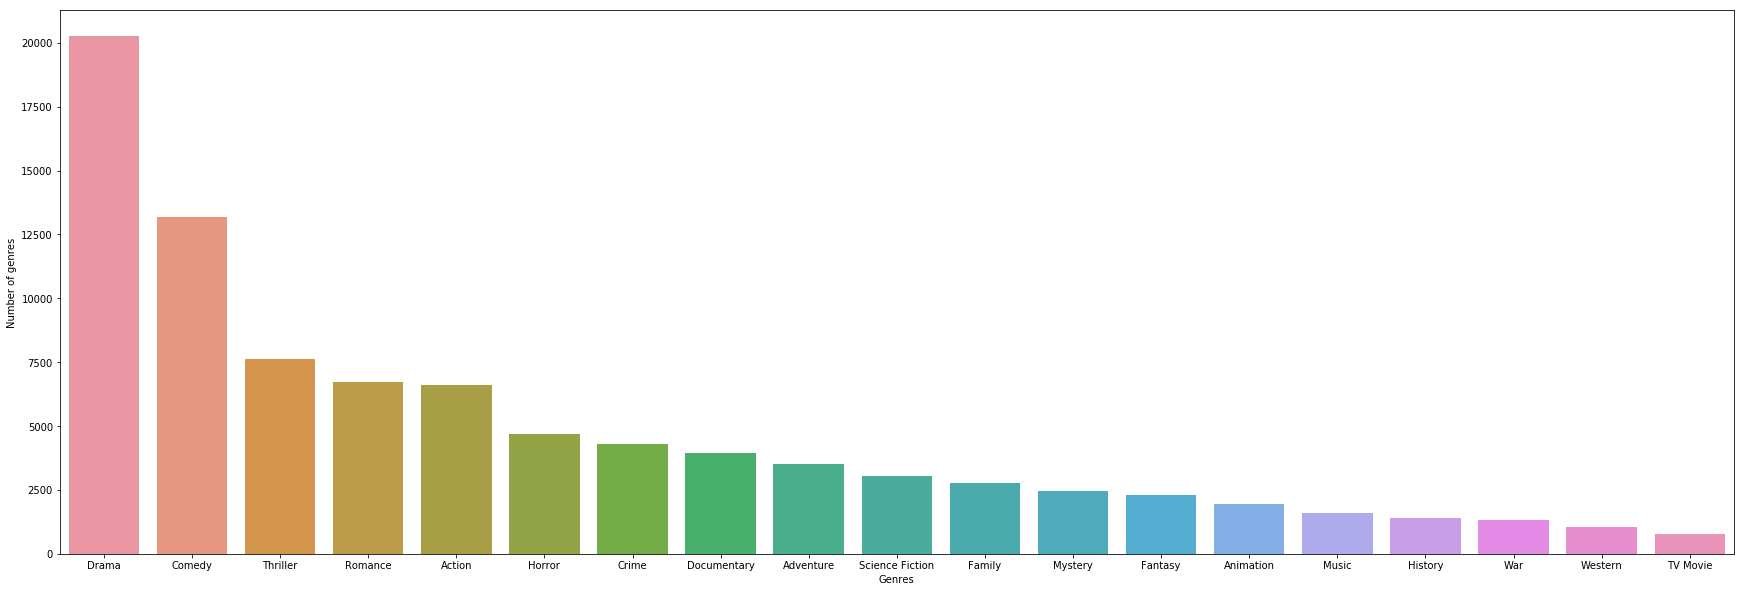

In [94]:
plot_histogram(genres,'Genres','Number of genres',invert=True)

## Frequent words in movie overview 

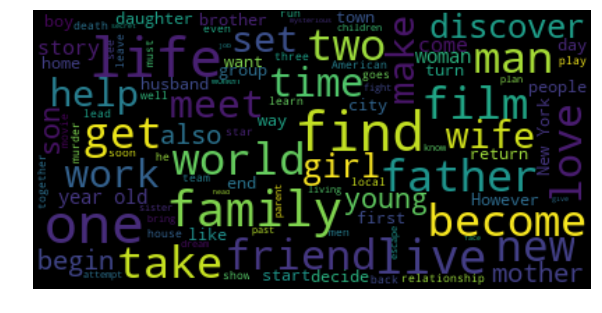

In [103]:
overview_text = get_all_text(movie_metadata,'overview')
plot_wordcloud(overview_text,(10,10))

## Frequent words in movie tagline  

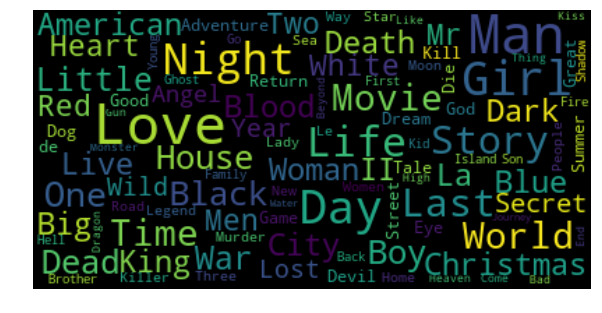

In [104]:
tagline_text = get_all_text(movie_metadata,'title')
plot_wordcloud(tagline_text,(10,10))

## Top 30 most frequent keywords  

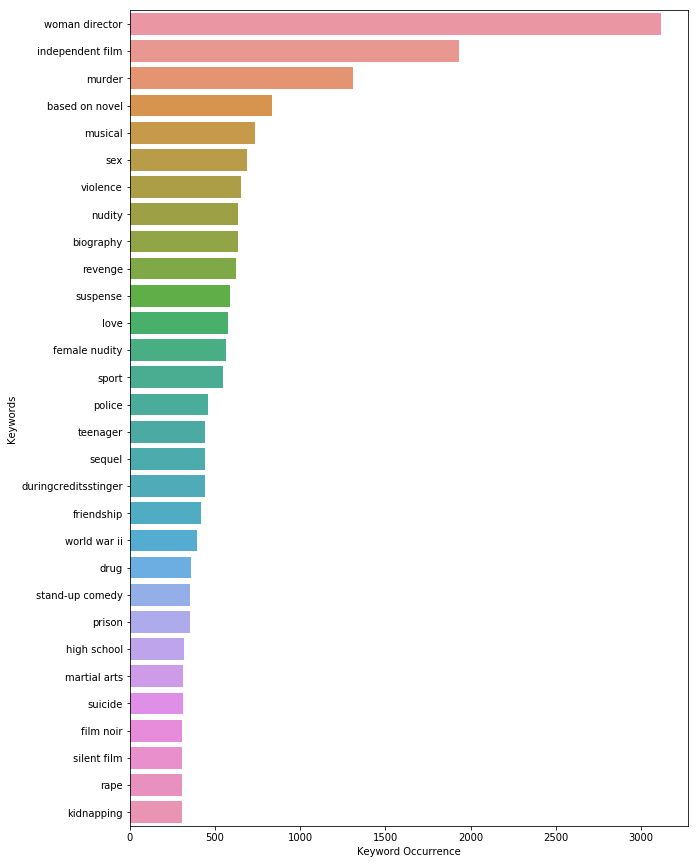

In [144]:
top_30 = most_frequent_words(frequent_keywords)
plot_histogram(top_30,'Keywords','Keyword Occurrence')

## Five most frequent genre movies produced for top 10 production countries 

## Average Movie Popularity per genre over the years (post 2000)

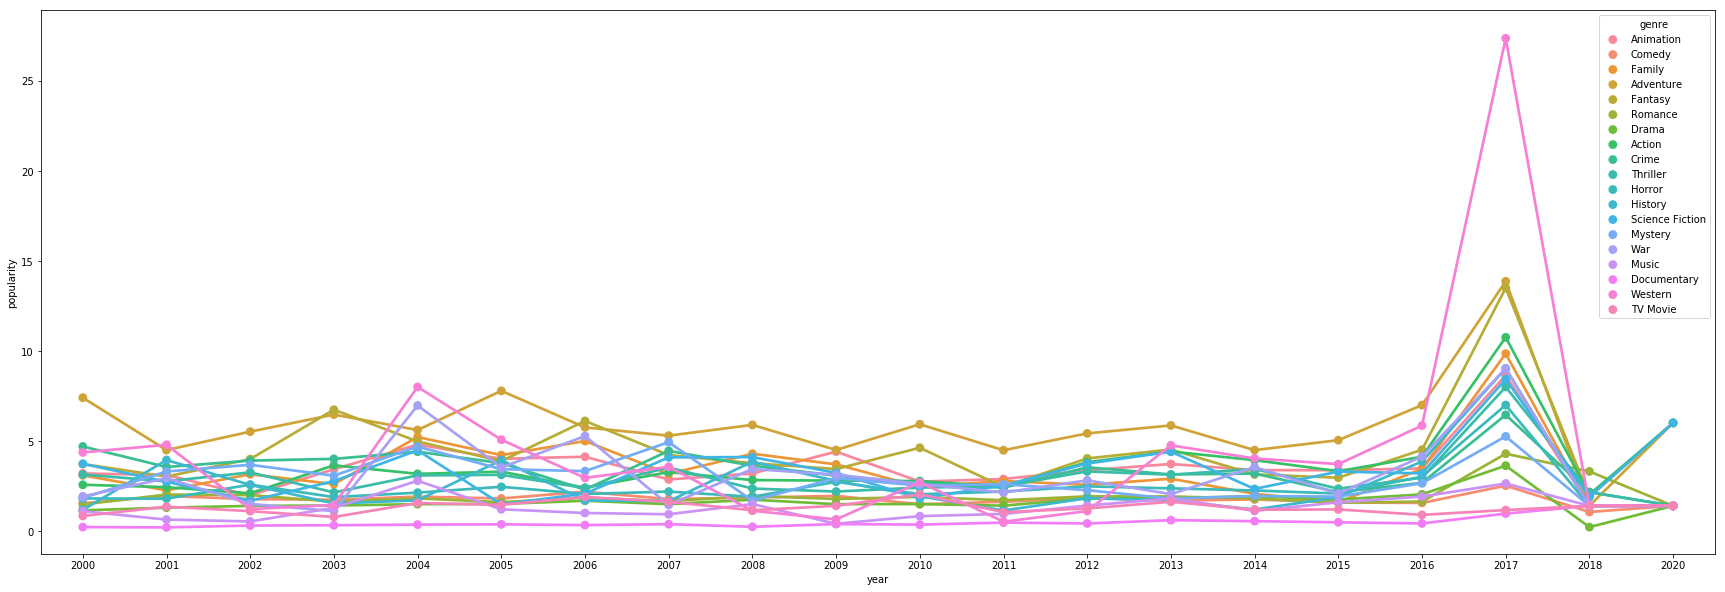

In [163]:
data = movie_metadata[movie_metadata['year'] >= 2000]
years = list(np.unique(data['year']))
plot_pointplot(data,years,list(genres.keys()),'year','genre',
               'popularity')

## Five most commonly occuring keywords per genre 

## Average voter rating per genre film over the years (post 2000)

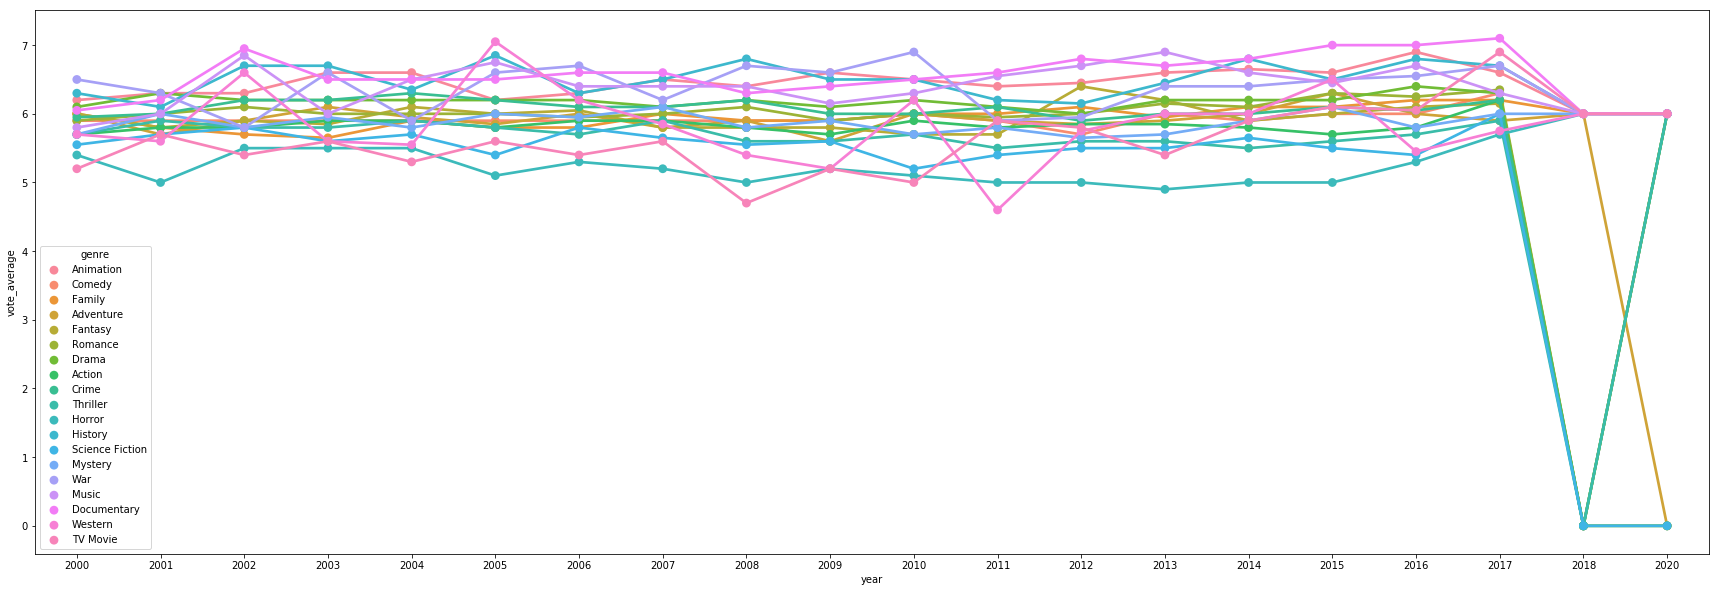

In [169]:
plot_pointplot(data,years,list(genres.keys()),'year','genre',
               'vote_average')

# Association Rule Mining

## Helper Functions 

In [ ]:
def count(itemset,df):
    # Scans the dataframe to compute intersection of all the rows for which 
    # binarized attributes are all 1. The number of intersection rows is the 
    # minimum support of the itemset/transaction in the data
    intersection = np.arange(df.shape[0])
    for item in itemset:
        rows = np.where(df.loc[:,item] == 1)
        intersection = np.intersect1d(intersection,rows[0])
    return len(intersection)/df.shape[0]
        
def frequent_itemsets(df,cols,minsup=0.02):
    all_itemsets = list()
    pruned_cols = set()
    k_plus_one_itemsets = list()
    k_itemsets = list()
    map_counts = defaultdict(int)
    # For each column attribute, scans the database and prunes those 
    # attributes whose support is not atleast as big as minsup, further
    # it stores the support of each column in the dictionary
    for col in cols:
        item = frozenset([col])
        count_item = count(item,df)
        if count_item >= minsup:
            k_itemsets.append(item)
            map_counts[item] = count_item
            pruned_cols.add(col)
    all_itemsets.extend(k_itemsets)
    # While no new itemsets are generated, it loops through each
    # possible column from the pruned columns and each itemset 
    # from length-k itemsets to generate length-k+1 itemsets, 
    # finally it returns all the itemsets as well as their counts
    while(k_itemsets):
        for col in pruned_cols:
            for itemset in k_itemsets: 
                new_list = list(itemset)
                new_list.append(col)
                new_set = frozenset(new_list)
                if (col not in itemset and 
                    new_set not in map_counts and 
                    count(new_set,df) >= minsup):
                    count_set = count(new_set,df)                    
                    k_plus_one_itemsets.append(new_set)
                    map_counts[new_set] = count_set
        all_itemsets.extend(k_plus_one_itemsets)
        k_itemsets = k_plus_one_itemsets
        k_plus_one_itemsets = []
    return (all_itemsets,map_counts)

def print_counts(counts):
    for key in counts:
        print(str(key) + " -> " + str(counts[key]))

def all_possible_rules(LHS,RHS,counts,total_sup,confidence,cur_rules,df):
    # rules is where all the possible rules are stored like so [LHS,RHS] 
    # where LHS and RHS are frozensets representing the left hand side 
    # itemset and right hand side itemset of the association rule
    rules = list()
    # If length of left hand rule is bigger than right hand rule, then we generated
    # all possible combinations no need to backtrack further
    if(len(LHS) > len(RHS)):
        # For each item in left hand side frozenset, subtract it from LHS 
        # to compute itemset whose length is one less, and right itemset 
        # whose length is one greater extending from the right hand side 
        # of the rule which called the backtrack
        for item in LHS:
            rule_LHS = frozenset([item])
            rule_RHS = list(LHS - rule_LHS)
            rule_RHS.extend(list(RHS))
            rule_RHS = frozenset(rule_RHS)
        # Interchange the left hand side and right hand side to get both 
        # possible combinations of the rule
            rule1 = [rule_LHS,rule_RHS]
            rule2 = [rule_RHS,rule_LHS]
            if(rule_LHS not in counts):
                counts[rule_LHS] = count(rule_LHS,df)
            if(rule_RHS not in counts):
                counts[rule_RHS] = count(rule_RHS,df)
            if(len(rule_LHS) != 0 and 
               counts[rule_LHS] != 0 and 
               total_sup/counts[rule_LHS] >= confidence and 
               rule1 not in cur_rules):
                rules.append(rule1)
            if(len(rule_RHS) != 0 and 
               counts[rule_RHS] != 0 and
               total_sup/counts[rule_RHS] >= confidence and 
               rule2 not in cur_rules):
                rules.append(rule2)
            sub_rules = all_possible_rules(rule_LHS,rule_RHS,counts,
                                            total_sup,confidence,
                                            cur_rules,df)
            rules.extend(sub_rules)    
    return rules

def apriori(itemsets,counts,df,confidence=0.65):
    all_rules = list()
    # For each itemset only find all possible rules for that itemset if
    # its length is bigger than or equal to two because the LHS and RHS 
    # need to be of length atleast for proper association rules.
    for itemset in itemsets:
        if(len(itemset) >= 2):
            rules = all_possible_rules(itemset,{},counts,counts[itemset],
                                       confidence,all_rules,df)
            for rule in rules:
                if(rule not in all_rules):
                    all_rules.append(rule)
    return all_rules

def print_rules(rules):
    # Print all the rules with the left hand side and right hand side
    for rule in rules:
        print(str(rule[0]) + ' --> ' + str(rule[1]))

## Association Rules

In [139]:
movie_metadata = pd.read_hdf(path+'intermediate-files/intermediate1.h5',key='df')
cols = ['adult','video']
cols.extend(list(production_companies.keys()))
cols.extend(list(frequent_keywords.keys()))
cols.extend(list(genres.keys()))
cols.extend(list(non_genres))
itemsets,counts = frequent_itemsets(movie_metadata,cols,0.005)
rules = apriori(itemsets,counts,movie_metadata)
print("Rules")
print_rules(rules)

Rules
frozenset({'world war ii'}) --> frozenset({'Drama'})
frozenset({'biography'}) --> frozenset({'Drama'})
frozenset({'love'}) --> frozenset({'Drama'})
frozenset({'History'}) --> frozenset({'Drama'})
frozenset({'War'}) --> frozenset({'Drama'})
frozenset({'stand-up comedy'}) --> frozenset({'Comedy'})
frozenset({'suspense'}) --> frozenset({'Thriller'})
frozenset({'martial arts'}) --> frozenset({'Action'})
frozenset({'alien'}) --> frozenset({'Science Fiction'})
frozenset({'dystopia'}) --> frozenset({'Science Fiction'})
frozenset({'woman director', 'Romance'}) --> frozenset({'Drama'})
frozenset({'independent film', 'Romance'}) --> frozenset({'Drama'})
frozenset({'love', 'Romance'}) --> frozenset({'Drama'})
frozenset({'Crime', 'Romance'}) --> frozenset({'Drama'})
frozenset({'Foreign', 'Romance'}) --> frozenset({'Drama'})
frozenset({'History', 'War'}) --> frozenset({'Drama'})
frozenset({'Adventure', 'Thriller'}) --> frozenset({'Action'})


# Text Features

## Helper Functions

In [170]:
def word_count(sentence):
    try:
        return len(sentence.split(" "))
    except:
        return 1
    
def char_count(sentence):
    try:
        return len(sentence)
    except:
        return 0

def compute_average_word_length(sentence):
    try:
        words = sentence.split(" ")
        return sum([len(word) for word in words])/len(words)
    except:
        return 0

def count_stop_words(sentence):
    try:
        words = sentence.split(" ")
        stop_words = set(stopwords.words("english"))
        return len([word for word in words if word in stop_words])
    except:
        return 0

def count_uppercase_words(sentence):
    try:
        words = sentence.split(" ")
        return len([word for word in words if word.isupper()])
    except:
        return 0

def convert_to_lowercase(sentence):
    try:
        return sentence.lower()
    except:
        return ''

def remove_punctuation(sentence):
    try:
        sentence = sentence.replace('[\W\S]','')
        return " ".join([word for word in sentence.split(" ") if word.isalpha()])
    except:
        return ''

def remove_stop_words(sentence):
    try:
        stop_words = set(stopwords.words("english"))
        words = sentence.split(" ")
        return " ".join([word for word in words if word not in stop_words])
    except:
        return ''

def filter_words(sentence,frequent_words):
    try:
        return " ".join([word for word in sentence.split(" ") if word not in frequent_words])
    except:
        return ''

def tokenize(sentence):
    try:    
        tokens = word_tokenize(sentence)
        new_sentence = " ".join(["not" if word == "n't" else word for word in tokens])
        return new_sentence
    except:
        return ''

def stem(sentence):
    try:
        st = PorterStemmer()
        return " ".join([st.stem(word) for word in sentence.split(" ")])
    except:
        return ''

def lemmatize(sentence):
    try:
        lem = WordNetLemmatizer()
        return " ".join([lem.lemmatize(word) for word in sentence.split(" ")])
    except:
        return ''

def preprocess_text(df,col_name,nfeatures=1000):
  # Add Tfidf features, count words, Bag of words 
  # and some word embeddings
    df[col_name+'_word_count'] = df[col_name].apply(word_count)
    df[col_name+'_char_count'] = df[col_name].apply(char_count)
    df[col_name+'_avg_word_length'] = df[col_name].apply(compute_average_word_length)
    df[col_name+'_stop_words'] = df[col_name].apply(count_stop_words)
    df[col_name] = df[col_name].apply(convert_to_lowercase)
    df[col_name] = df[col_name].apply(remove_punctuation)
    df[col_name] = df[col_name].apply(remove_stop_words)
    df[col_name] = df[col_name].apply(tokenize) 
    df[col_name] = df[col_name].apply(stem)  
    df[col_name] = df[col_name].apply(lemmatize)  
    tf = TfidfVectorizer(max_features=nfeatures, ngram_range=(1,2), analyzer='word',
                       min_df=1, smooth_idf=True, sublinear_tf=True)
    tf_features = tf.fit_transform(df[col_name])
    tf_features_names = [col_name[0:1] + "_" + name for name in tf.get_feature_names()]
    tf_array = pd.DataFrame(tf_features.toarray(),columns=tf_features_names)
    df = pd.concat([df,tf_array],axis=1)
    df.drop([col_name],axis=1,inplace=True)
    return df

In [172]:
# movie_metadata = preprocess_text(movie_metadata,'overview',10000)
# movie_metadata = preprocess_text(movie_metadata,'tagline',4000)
# movie_metadata = preprocess_text(movie_metadata,'title',1000)
s = movie_metadata.columns.to_series()
movie_metadata.columns = s + s.groupby(s).cumcount().astype(str).replace({'0':''})
movie_metadata.head()
movie_metadata.to_hdf(path+'intermediate-files/intermediate2.h5',
                      key='df')

/Users/shashankp/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:1993: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['budget', 'popularity']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


# Feature Extraction (Dimensionality Reduction)

In [5]:
from sklearn.utils.extmath import randomized_svd
movie_metadata = pd.read_hdf(path+'intermediate-files/intermediate2.h5')
movie_metadata = randomized_svd(movie_metadata.values,n_components = 200)
# movie_metadata = pca.fit_transform(movie_metadata)

TypeError: can't multiply sequence by non-int of type 'float'

# Split into train/test data 

# Training and Evaluation 

# Supervised Learning 

## Naive Bayes 

## SVM (One vs. Rest Classifier)

## MLKnn (K-nearest neighbors)

## Random Forest Classifier

## Neural Networks